# Problem Statement

# ---------------------------------------------------------------------------------------------------------------

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the **highest claim settlement ratio.** It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to **optimize the cost of the insurance** by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months.** The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

# ---------------------------------------------------------------------------------------------------------------

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats


In [2]:
#reading the data as train and test

train=pd.read_csv(r"train_qWM28Yl.csv")
test=pd.read_csv(r"test_zo1G9sv.csv")

In [3]:
# reading our target file sheet as submission

submission=pd.read_csv(r"sample_submission_KvRh9Sx.csv")

In [4]:
#setting the columns at max by which we can see all the column in one go.

pd.set_option('display.max_columns', None)

In [69]:
# head of our train data.

# train.head(3)

In [70]:
# head of our test data

# test.head(3)

In [7]:
#shape of our train and test data

train.shape,test.shape

((58592, 44), (39063, 43))

In [8]:
# Combining the data of train and test and named it as combined. 

combined=pd.concat([train,test],ignore_index=True)

In [72]:
# A breif summary of our combined data

combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     97655 non-null  float64
 1   age_of_car                        97655 non-null  float64
 2   age_of_policyholder               97655 non-null  float64
 3   area_cluster                      97655 non-null  object 
 4   population_density                97655 non-null  int64  
 5   make                              97655 non-null  int64  
 6   segment                           97655 non-null  object 
 7   model                             97655 non-null  object 
 8   fuel_type                         97655 non-null  object 
 9   engine_type                       97655 non-null  object 
 10  airbags                           97655 non-null  int64  
 11  is_esc                            97655 non-null  int64  
 12  is_a

In [10]:
# making a new variable named num_cols and cat_cols and one is categorical columns and one is for numericals columns

num_cols=combined.select_dtypes(np.number).columns
cat_cols=combined.select_dtypes(include="object").columns

In [11]:
# length of our data 

len(num_cols),len(cat_cols)

(16, 28)

### Univariate Analysis

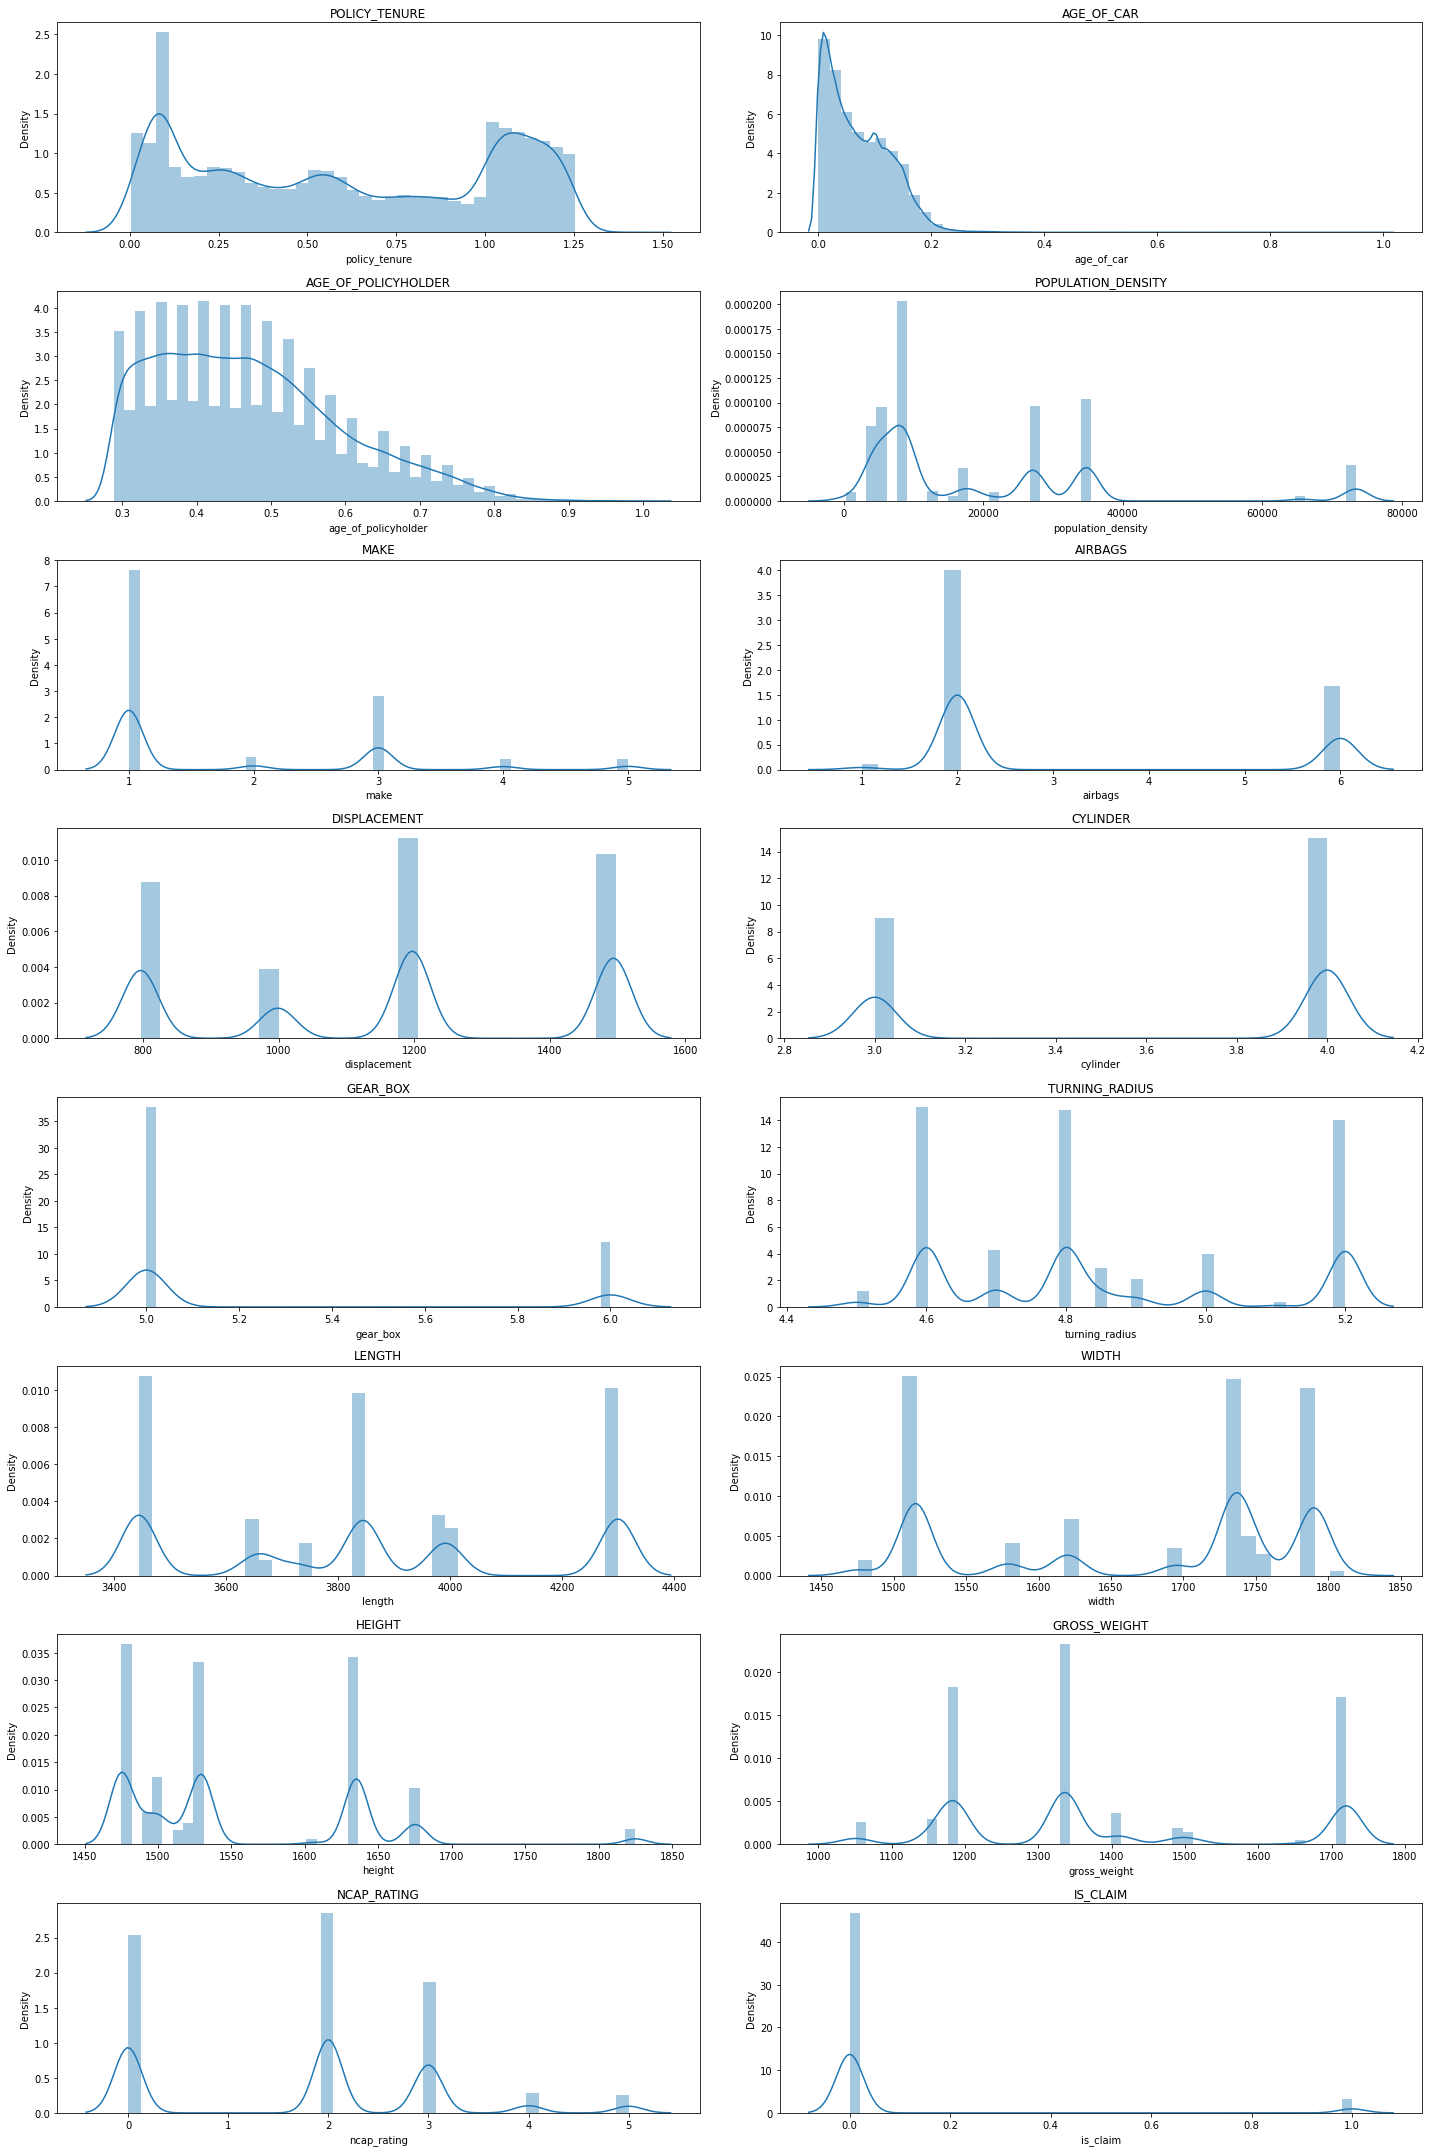

In [12]:
# visualization of our numerical columns 
# showing the distplot of all numericals columns

plt.figure(figsize=(20,30))
iterator=1
for i in num_cols:
    plt.subplot(8,2,iterator)
    sns.distplot(combined[i])
    plt.title(i.upper())
    iterator+=1
    plt.tight_layout()
plt.show()

In [13]:
#Infrences from the distplot

# age of car,population density,age of policyholder, make,isclaim all are positively skewed

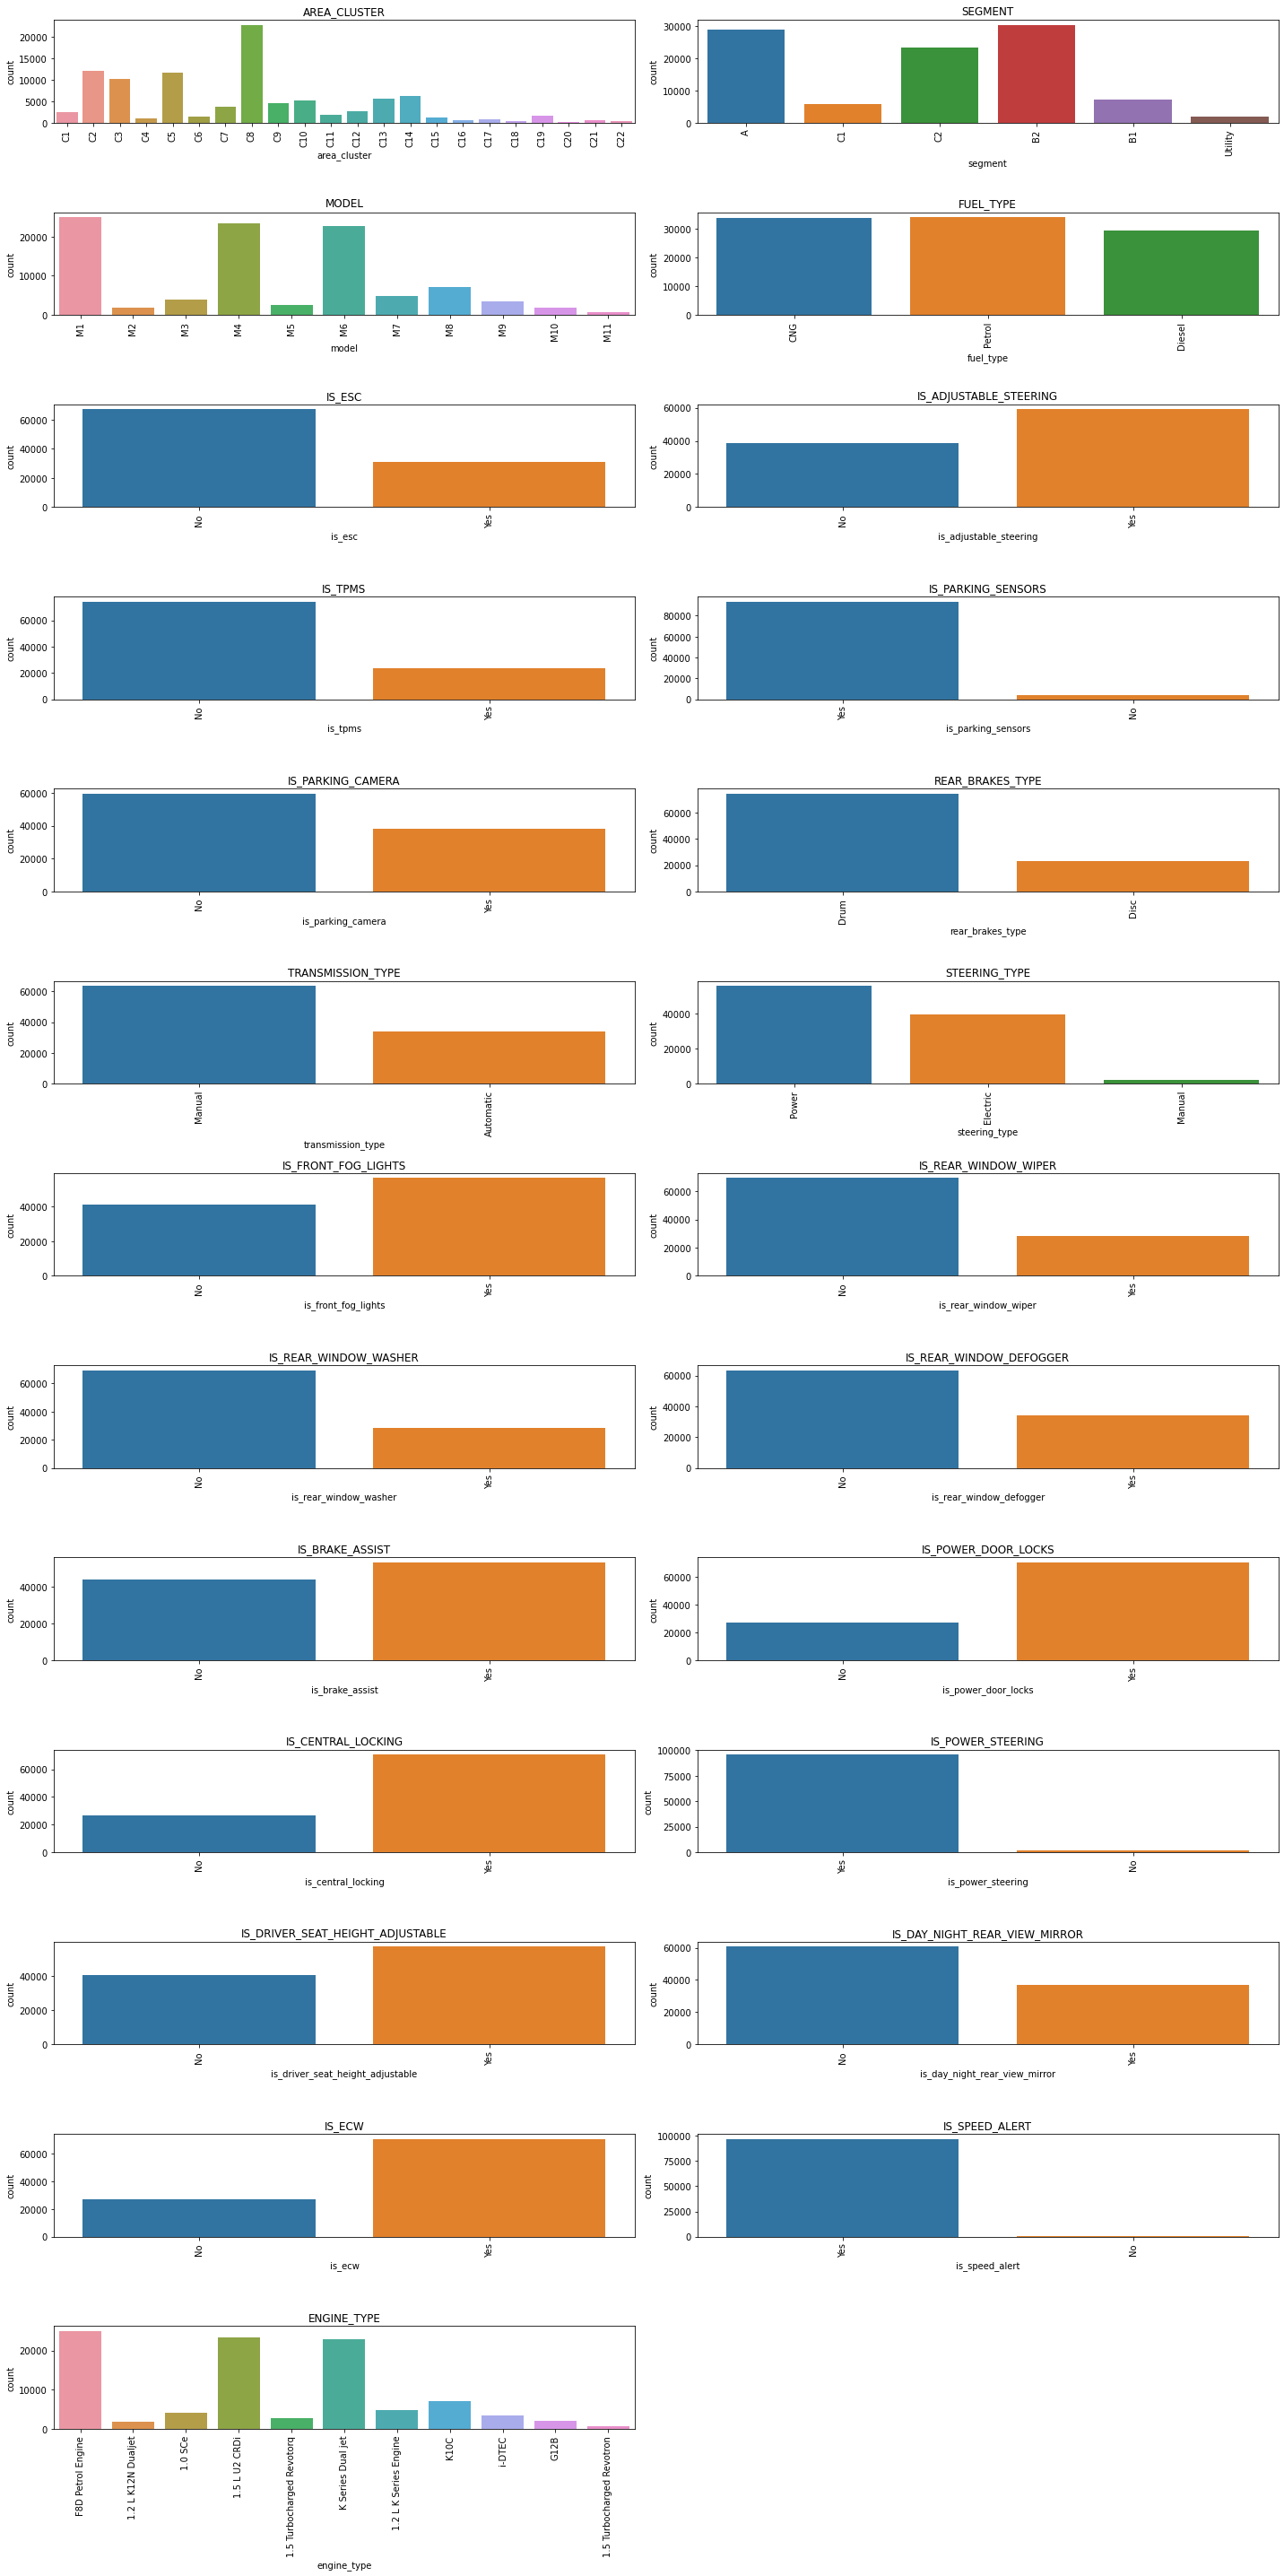

In [14]:
# creating a column cat_vars where all our categorical data lies
# making the countplot for all the categorical columns

cat_vars=[ 'area_cluster', 'segment', 'model', 'fuel_type', 'is_esc','is_adjustable_steering', 'is_tpms',
          'is_parking_sensors','is_parking_camera', 'rear_brakes_type', 'transmission_type','steering_type',
          'is_front_fog_lights', 'is_rear_window_wiper','is_rear_window_washer', 'is_rear_window_defogger',
          'is_brake_assist','is_power_door_locks', 'is_central_locking', 'is_power_steering','is_driver_seat_height_adjustable',
          'is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert', 'engine_type']
plt.figure(figsize=(20,40))
iterator=1
for i in cat_vars:
    plt.subplot(13,2,iterator)
    sns.countplot(combined[i])
    plt.title(i.upper())
    plt.xticks(rotation=90)
    iterator+=1
    plt.tight_layout()
plt.show()

In [15]:
# Infrences of our categorical variables.
# In area cluster C8 hqas the highest count.
# Segment A and B2 has the highest number of count
# Model M1,M4,M6 has the highest number of count
# CNG and PETROL has the highest number of cars
# Most of the cars doesnt have Electronic Stability Control (ESC)
# Most of the cars have adjustable steering wheel
# Most of the cars doesnt have Tyre Pressure Monitoring System (TPMS)
# Most of the cars have parking sensors
# Most of the cars doesnt have parking camers
# Drum breaks types have the most cars
# Manual cars are more in the market
# Power steering type have the highest number of cars
# Most of the cars doesnt have is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_day_night_rear_view_mirror
# Most of the cars have is_speed_alert,is_ecw,is_driver_seat_height_adjustable,

### Bivariate Analysis

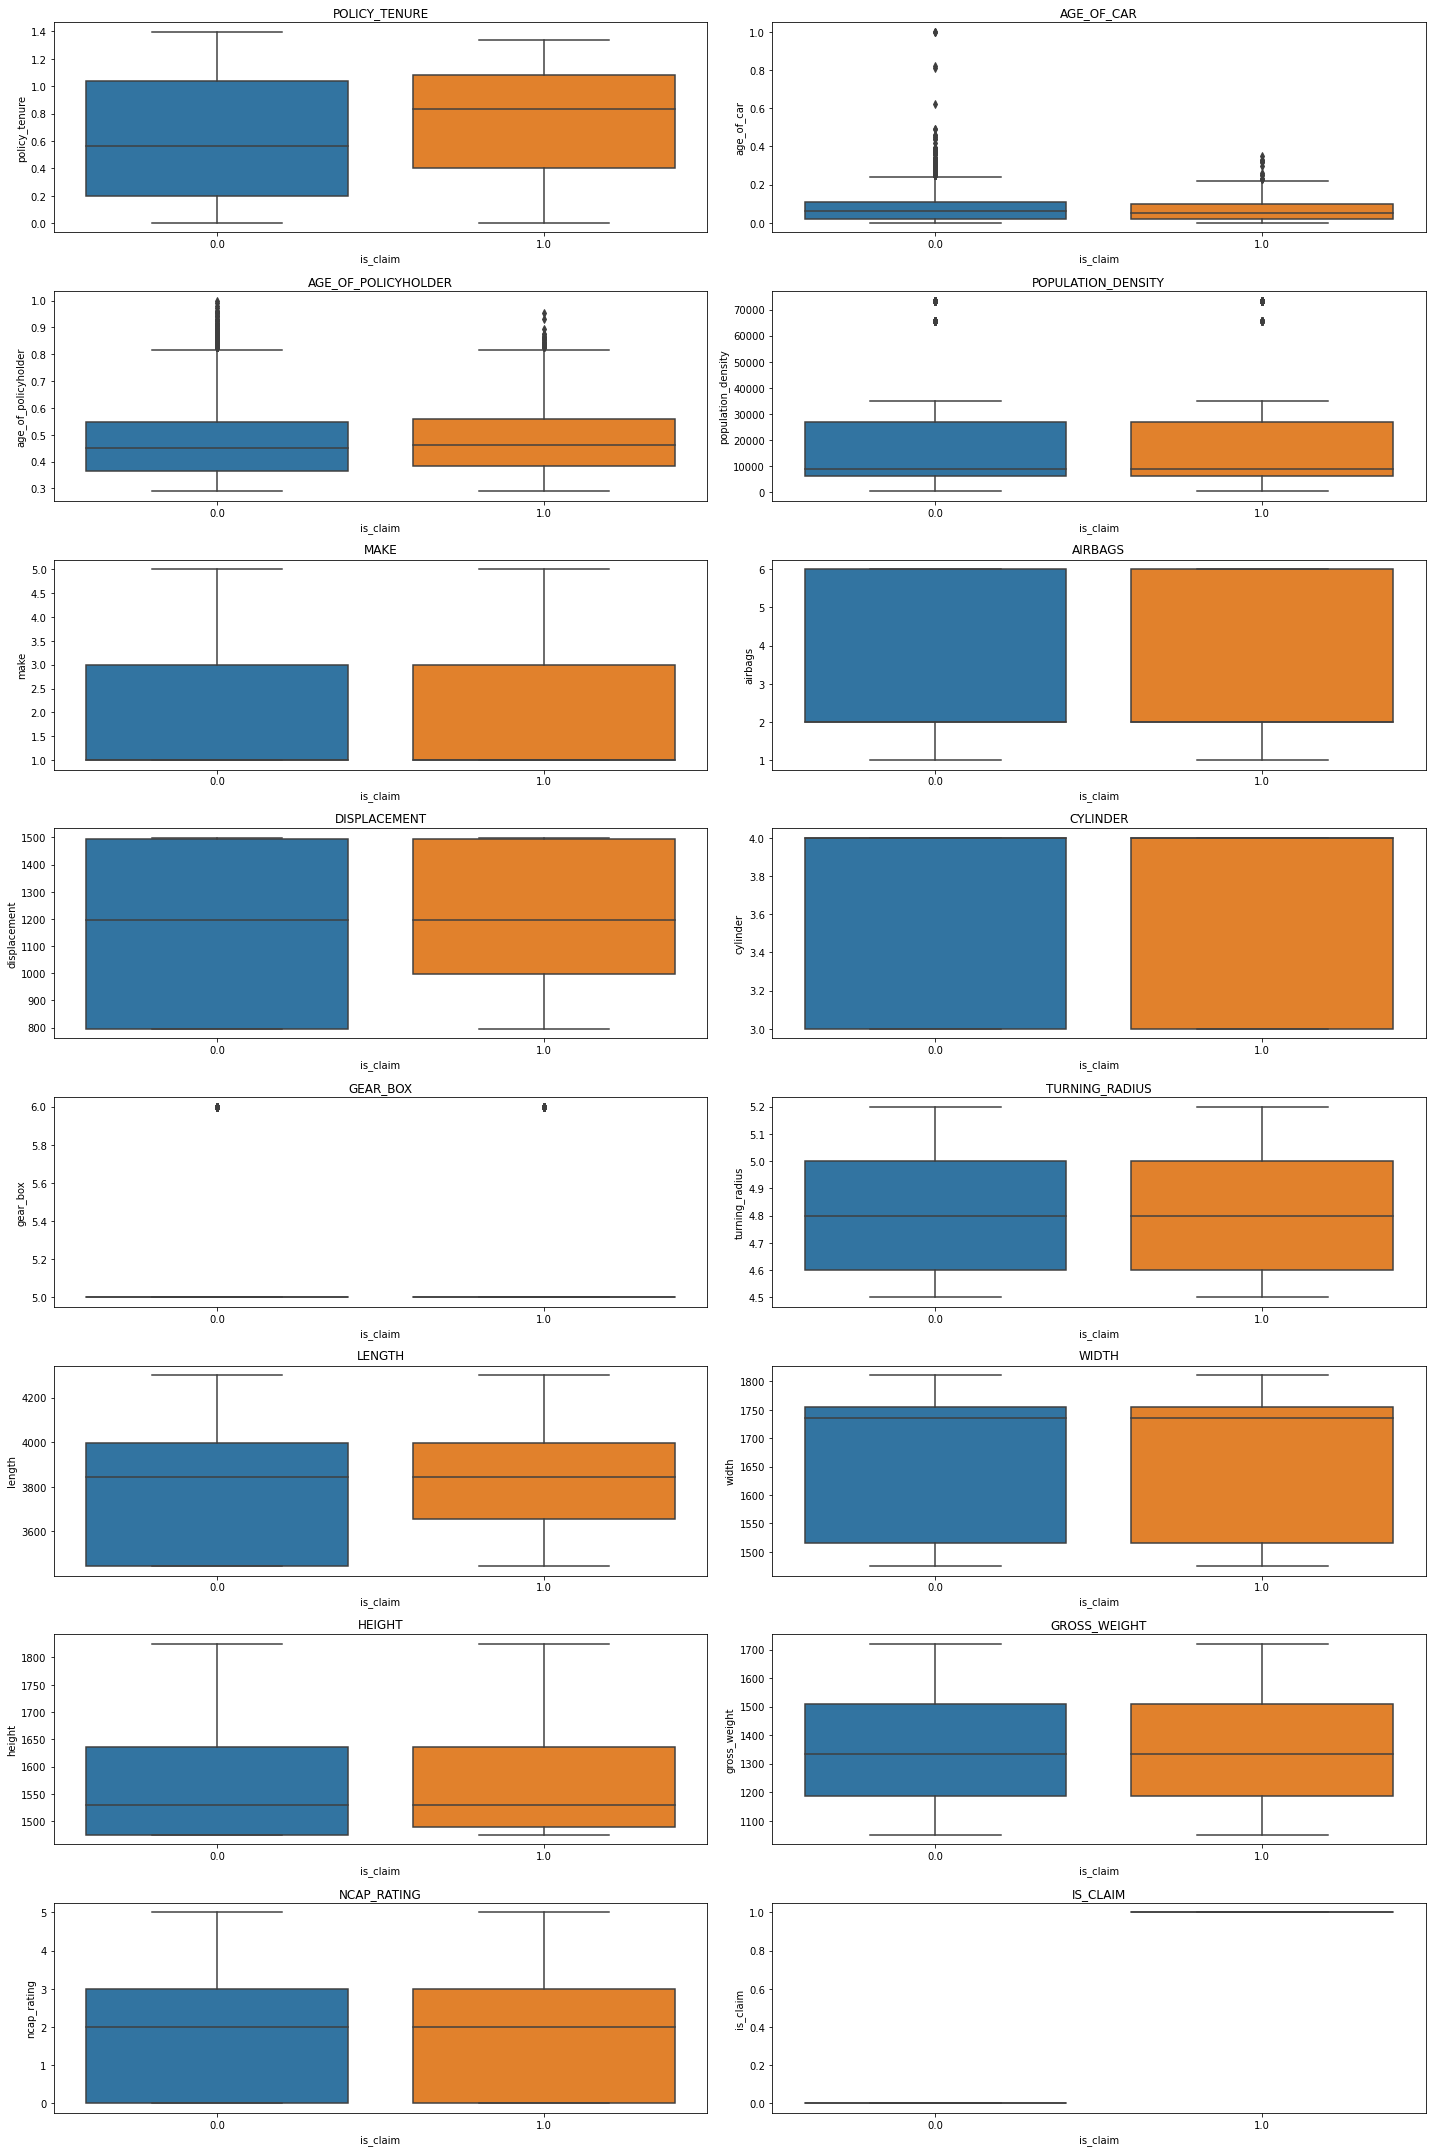

In [16]:
# displaying the bivariate analysis of numerical variable

plt.figure(figsize=(20,30))
iterator=1
for i in num_cols:
    plt.subplot(8,2,iterator)
    sns.boxplot(combined["is_claim"],combined[i])
    plt.title(i.upper())
    iterator+=1
    plt.tight_layout()
plt.show()

In [17]:
# Apply the statistical test

# Two sample independent T-test
# Ho:: feature has no effect on the target or vice versa
# Ha:: feature have effect on the target or vice versa

imp_feats=[]

for i in num_cols:
    zero=combined.loc[combined.is_claim==0,i]
    one=combined.loc[combined.is_claim==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one,alternative="two-sided")
    if pvalue<0.05:
        imp_feats.append(i)
print(imp_feats)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


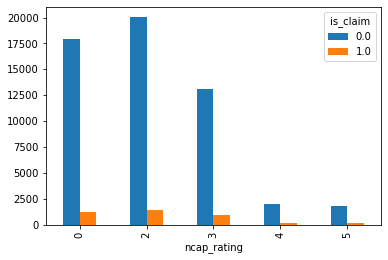

In [18]:
# Ncap rating vs target 
pd.crosstab(combined.ncap_rating,combined.is_claim).plot(kind="bar")
plt.show()

# we can consider that the cars have the lowest ncap rating are more prone to claims

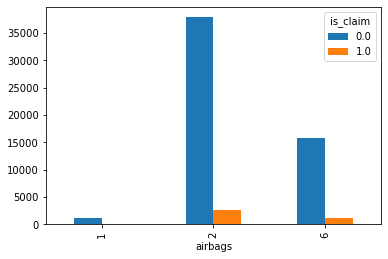

In [19]:
# Airbags rating vs target 

pd.crosstab(combined.airbags,combined.is_claim).plot(kind="bar")
plt.show()


In [20]:
# cat vs target statistical test

cat_feats=[]
for i in cat_vars:
    tbl=pd.crosstab(combined[i],combined.is_claim)
    teststats,pvalue,dof,exp_freq=stats.chi2_contingency(tbl)
    
    if pvalue<0.05:
        cat_feats.append(i)
print(cat_feats)

['area_cluster', 'segment', 'model', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable', 'engine_type']


### Feature Engineering

In [21]:
# Splitting the column into two columns where the @ lies in the rows and making two new variables

combined[["Nm_torque","rpm_torque"]]=combined.max_torque.str.split("@",expand=True)

In [22]:
#Splitting the column into two columns where the @ lies in the rows

combined[["hp","rpm_power"]]=combined.max_power.str.split("@",expand=True)

In [23]:
# removong the extra information from our data and converting them into float data types.

combined.rpm_torque=combined.rpm_torque.apply(lambda x: float(x.replace("rpm","")))
combined.rpm_power=combined.rpm_power.apply(lambda x: float(x.replace("rpm","")))
combined.hp=combined.hp.apply(lambda x: float(x.replace("bhp","")))
combined.Nm_torque=combined.Nm_torque.apply(lambda x: float(x.replace("Nm","")))

#another way to replace the string

#combined['rpm_torque']=combined.rpm_torque.apply(lambda x:float(x[:-3]))
#combined['rpm_power']=combined.rpm_power.apply(lambda x:float(x[:-3]))
#combined['hp']=combined.hp.apply(lambda x:float(x[:-3]))
#combined['Nm_torque'] = combined.Nm_torque.apply(lambda x:float(x[:-2]))

In [24]:
# MAking our target variable that the claim is taken or not

for i in cat_vars:
    if i.startswith("is")&(i!="is_claim"):
        mapp={"Yes":1,"No":0}
        combined[i]=combined[i].map(mapp)

In [25]:
# checking the non 0 values in the rows

combined.isnull().sum()[combined.isnull().sum()!=0]

is_claim    39063
dtype: int64

In [26]:
# making a new variable ,per_unit_power and per_unit_torque ,age_prop

combined["per_unit_power"]  =  combined.rpm_power/combined.hp
combined["per_unit_torque"]  =  combined.rpm_torque/combined.Nm_torque
combined["age_prop"]=combined.age_of_car/combined.age_of_policyholder

In [27]:
# Making a new variable for better result and named it as magic 1

combined["magic1"]=combined.groupby(by="area_cluster")["policy_id"].transform("nunique")

In [28]:
# Statistical test for our magic1 column 

zero=combined.loc[combined.is_claim==0,"magic1"]
one=combined.loc[combined.is_claim==1,"magic1"]
stats.ttest_ind(zero,one)

# showing a very good p value 2.1267052931968418e-05

Ttest_indResult(statistic=-4.251501393229284, pvalue=2.1267052931968418e-05)

In [29]:
# Count of policies in magic 1/pop density

combined["magic2"]=combined.magic1/combined.population_density

In [30]:
#Making a new variable for better result and named it as magic 2

zero=combined.loc[combined.is_claim==0,"magic2"]
one=combined.loc[combined.is_claim==1,"magic2"]
stats.ttest_ind(zero,one)

# showing a very good p value 0.00018338678692374335

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [31]:
# magic feature which we can make if the policy ids are not unique
#combined.groupby(by="policy_id")["policy_tenure"].transform("min")

In [32]:
#finding the summary statistics of policy_tenure and grouping by it with area_cluster
combined["magic3"] = combined.groupby(by="area_cluster")["policy_tenure"].transform("min")
combined["magic4"] = combined.groupby(by="area_cluster")["policy_tenure"].transform("max")
combined["magic5"] = combined.groupby(by="area_cluster")["policy_tenure"].transform("mean")
combined["magic6"] = combined.groupby(by="area_cluster")["policy_tenure"].transform("median")

In [33]:
# statistical summary for the magic columns we have created

list_feats=["magic1","magic2","magic3","magic4","magic5","magic6"]
for i in list_feats:
    zero=combined.loc[combined.is_claim==0,i]
    one=combined.loc[combined.is_claim==1,i]
    teststats,pvalue = stats.ttest_ind(zero,one)
    
    print("Pvalue: ",i,pvalue)

Pvalue:  magic1 2.1267052931968418e-05
Pvalue:  magic2 0.00018338678692374335
Pvalue:  magic3 0.01517380140799255
Pvalue:  magic4 0.1896759377985605
Pvalue:  magic5 2.5550496912611606e-07
Pvalue:  magic6 2.463473664106657e-07


In [34]:
# area cluster, model, fuel_type,engine,rear brakes,transmission,steering

In [35]:
# Replacing the values with 0 and 1 of transmission_type,rear_brakes_type

combined.transmission_type=np.where(combined.transmission_type=="Manual",1,0)

combined.rear_brakes_type=np.where(combined.rear_brakes_type=="Drum",1,0)

In [36]:
# Value counts steering_type

combined.steering_type.value_counts()

Power       56037
Electric    39684
Manual       1934
Name: steering_type, dtype: int64

In [37]:
# installing and importing the libraries
#! pip install category_encoders

import category_encoders as ce

In [38]:
# dropping the unessary columns

combined.drop(['policy_id','max_torque', 'max_power','magic4'],axis=1,inplace=True)

In [39]:
# splitting the data in newtrain,newtest

newtrain=combined.loc[0:train.shape[0]-1,]
newtest=combined.loc[train.shape[0]:, ]

In [40]:
# shape of the train,newtrain,newtest,test

train.shape,newtrain.shape,newtest.shape,test.shape

((58592, 44), (58592, 53), (39063, 53), (39063, 43))

In [41]:
# drop the target variable from train test

X=newtrain.drop("is_claim",axis=1)
newtest=newtest.drop("is_claim",axis=1)
y=newtrain.is_claim

In [42]:
# doing the target encoding 

mycols=['area_cluster','steering_type','segment','engine_type','model','fuel_type']

tgt=ce.TargetEncoder(cols=mycols)

In [43]:
# fitting the target encoder in our data 

newx = tgt.fit_transform(X,y)
test_encoded= tgt.transform(newtest)

In [44]:
# create unit_weight

newx["per_unit_vol"] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded["per_unit_vol"] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [45]:
# scale the dataset

scale=["policy_tenure","population_density","displacement","length","width","height","gross_weight","Nm_torque","rpm_torque",
       "per_unit_power","per_unit_torque","hp","rpm_power","magic1","magic3","magic5","magic6"]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

for i in scale:
    newx.loc[:,i]=sc.fit_transform(pd.DataFrame(newx.loc[:,i]))
    test_encoded.loc[:,i]=sc.transform(pd.DataFrame(test_encoded.loc[:,i]))

## Building Machine Learning Modeling

#### Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy")
pred=rf.fit(newx,y).predict(test_encoded)

In [47]:
submission["is_claim"]=pred

In [48]:
submission.to_csv("Randommodel.csv",index=False) #0.036

In [49]:
cd

C:\Users\raj50


#### Appply smote

In [50]:
# ! pip install imblearn
from imblearn.over_sampling  import SMOTE
smote=SMOTE()

In [51]:
# Resmaple the data using smote

smotex,smotey=smote.fit_resample(newx,y)

In [52]:
# Applying the Random forest after applying the smote

rf=RandomForestClassifier(criterion="entropy")

pred_smote=rf.fit(smotex,smotey).predict(test_encoded)

In [53]:
# second model after smote

submission["is_claim"]=pred_smote
submission.to_csv("RandomAfterSmotemodel.csv",index=False)# 0.10615595075239397,

In [54]:
# IMPORT THE LIBRARIES
# ! pip install lightgbm
# ! pip install catboost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [55]:
# defing the function for our models

def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["rf"]=RandomForestClassifier(criterion="entropy")
    models["ada"]=AdaBoostClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["xgb"]=XGBClassifier()
    models["lgbm"]=LGBMClassifier()
    models["catboost"]=CatBoostClassifier()
    models["naivebayes"]= GaussianNB()
    return models

In [56]:
# Evaluation function

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score , StratifiedKFold
        

In [57]:
#  defing the function for our evaluation metrics

def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,smotex,smotey,scoring="f1",cv=cv,error_score="raise",n_jobs=-1)
    return score

In [58]:
# Build all the models...

# Build the models...result,names=list(),list()
models=base_models()

result, names = list(), list()
for name, model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)

    print('%s %.3f(%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.590(0.003)
rf 0.750(0.159)
ada 0.738(0.131)
gbm 0.774(0.130)
xgb 0.812(0.138)
lgbm 0.835(0.136)
catboost 0.853(0.133)
naivebayes 0.820(0.151)


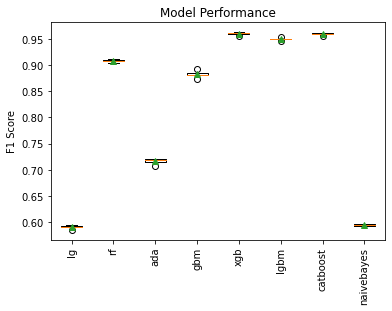

In [59]:
# visualization of our models

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [60]:
# final models-xgb,lgbm,catboost

from sklearn.ensemble import StackingClassifier
base=[("xgb",XGBClassifier()),("lgbm",LGBMClassifier())]
      
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
      
from  sklearn.ensemble import StackingClassifier
      
stack= StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=cv)

In [68]:
#pred_stack=stack.fit(smotex,smotey).predict(test_encoded)

In [62]:
#  creating the third file for our stacking model

submission["is_claim"]=pred_stack
submission.to_csv("stackingmodel.csv",index=False)

In [67]:
# Direct Cat boost model

#cboost=CatBoostClassifier(scale_pos_weight=10)
#pred_catboost=cboost.fit(smotex,smotey).predict(test_encoded)


In [65]:
# creating the file of our catboost model

submission["is_claim"]=pred_catboost
submission.to_csv("Catboostmodel.csv",index=False)


In [66]:
cd


C:\Users\raj50
